   Unnamed: 0     Brand                Headline  \
0           0  Just Eat           owe money pay   
1           1  Just Eat       p1ss poor attempt   
2           2  Just Eat    compensation thieves   
3           3  Just Eat  worst customer service   
4           4  Just Eat  awful customer service   

                                              Review  Grade  
0  owed money meal half empty cold dec 23  making...      1  
1  ordered night delivery time 1825  1845as earli...      1  
2  careful money stealing delivering jokes compan...      1  
3  worst customer service received requested refu...      1  
4  awful customer service past months ive faced 2...      1  


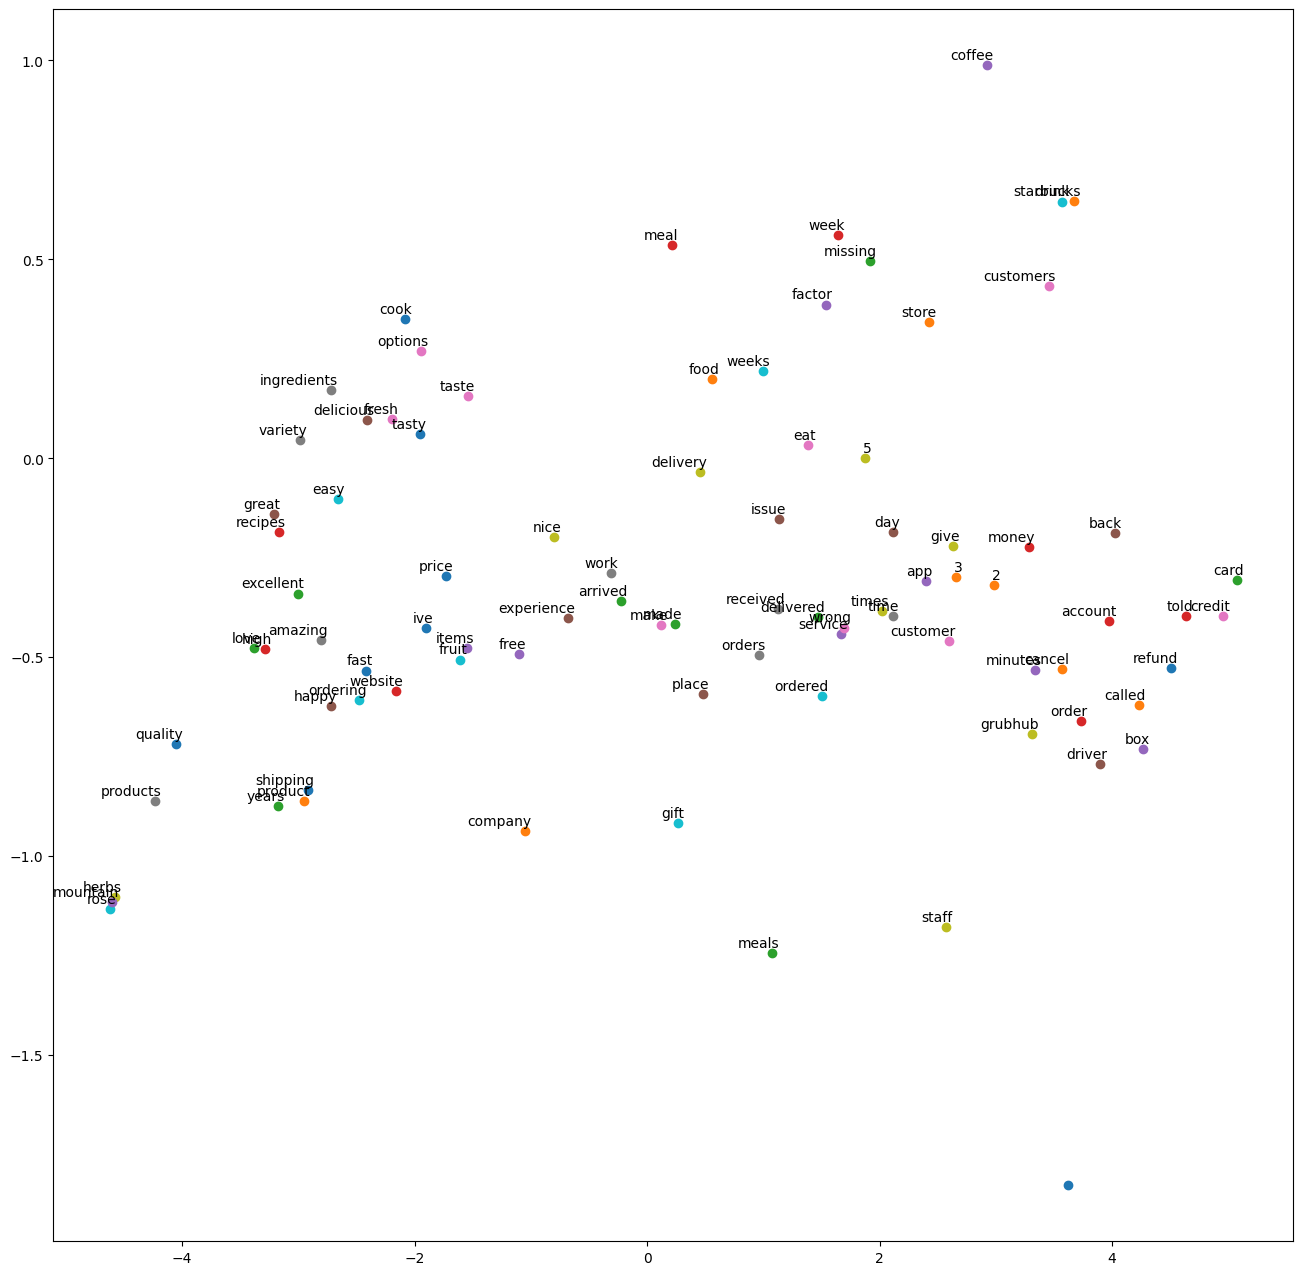

In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#matplotlib inline

data = pd.read_csv('D:/Artus/École/A5/Machine Learning for NLP/Projet 2/trustpilot_en_50_page.csv')
STOP_WORDS = nltk.corpus.stopwords.words()


def clean_sentence(val):
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    data = data.dropna(how="any")
    
    for col in ['Headline', 'Review']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)


def build_corpus(data):
    corpus = []
    for col in ['Headline', 'Review']:
        for sentence in data[col].items():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus


print(data.head(5))

corpus = build_corpus(data)        
corpus[0:2]


model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4)

vocab = []
for i in range(0,len(model.wv)):
        vocab.append(model.wv.index_to_key[i])



def tsne_plot(model):
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)


    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

tsne_plot(model)